In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import ADF
import numpy as np
import matplotlib.pyplot as plt


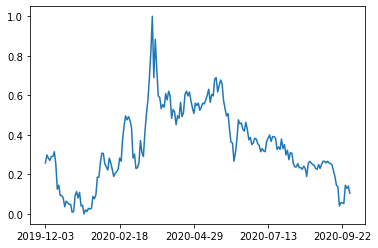

In [2]:
#file read
var=pd.read_csv(r'C:\Users\Hon Kim\Desktop\창종설\var.csv',encoding='cp949',index_col=0)
#예시로 'kousx' 데이터 그래프 확인
v1 = var.kousx.copy()
v1.name = 'v1'
fig = v1.plot()

In [3]:
#단위근 검정 및 불안정리스트 생성 함수 정의
def sTest(X):
    result = adfuller(X)
    print('1. ADF Statistic: %f' % result[0])
    print('2. p-value: %f' % result[1])
    print("3. Num Of Lags : ", result[2])
    print("4. Num Of Observations :", result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if(result[1] > 0.1):
        print("nonStationary")
        print()
        return True
    else:
        print("Stationary")
        print()
        return False

In [4]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import ADF
v1 = var.kousx.copy()
adf = ADF(v1)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.514
P-value                         0.527
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [5]:
# 각 변수 안정상태 확인 및 불안정 데이터 리스트 생성
title = list(var.columns)
nonStationary = []
for i in title:
    series = var[i]
    print('column: ', i)
    if(sTest(series)):
        nonStationary.append(i)


column:  kousx
1. ADF Statistic: -1.514150
2. p-value: 0.526500
3. Num Of Lags :  6
4. Num Of Observations : 199
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
nonStationary

column:  gold
1. ADF Statistic: -1.434568
2. p-value: 0.565596
3. Num Of Lags :  1
4. Num Of Observations : 204
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
nonStationary

column:  오존
1. ADF Statistic: -1.781528
2. p-value: 0.389670
3. Num Of Lags :  7
4. Num Of Observations : 198
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
nonStationary

column:  아황산농도
1. ADF Statistic: -4.589257
2. p-value: 0.000135
3. Num Of Lags :  2
4. Num Of Observations : 203
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary

column:  평균기온
1. ADF Statistic: -1.318624
2. p-value: 0.620609
3. Num Of Lags :  7
4. Num Of Observations : 198
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
nonStationary

column:  습도
1. ADF Statistic: -9.335391
2. p-value: 0.000000
3. Num Of Lags :  6
4. Num Of Observa

In [6]:
nonStationary

['kousx', 'gold', '오존', '평균기온', '뉴스빈도', '총거래대금', '전체시총', 'ksvkospi', 'trend']

In [7]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(1,len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)

	return pd.Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

In [8]:
# create a log transformed series 
def logTrans(dataset):
	diff = dataset.apply(lambda x: np.log(x)) 

	return pd.Series(diff)

# create a power transformed series
def powTrans(dataset):
	diff = dataset.apply(lambda x : x ** 0.5)

	return pd.Series(diff)

In [10]:
# create a rolling mean series 
def rolling_30(dataset):
	rolling_mean = dataset.rolling(window = 30).mean()
	rolled_detrended = dataset - rolling_mean

	return pd.Series(rolled_detrended)

In [58]:
# create a rolling mean series 
def rolling_7(dataset):
	rolling_mean = dataset.rolling(window = 7).mean()
	rolled_detrended = dataset - rolling_mean

	return pd.Series(rolled_detrended)

206


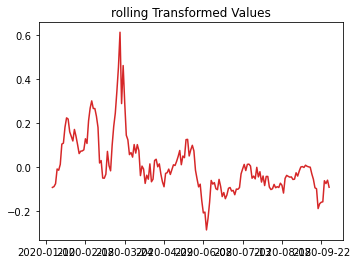

In [65]:
# Ex1) rolling horizon을 사용하여 deTrend 
# define a dataset with a linear trend
v1 = var.kousx
# remove rolling horizon the dataset
inverted = rolling_30(v1)

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="rolling Transformed Values", ax=ax1);

In [54]:
inverted.max()

0.6129032257

In [55]:
inverted.min()

-0.2851344089333328

In [16]:
#결측치 확인
inverted.isnull().sum()

29

In [12]:
#결측치 제거하고 시행
sTest(inverted.dropna())

1. ADF Statistic: -2.584785
2. p-value: 0.096183
3. Num Of Lags :  6
4. Num Of Observations : 170
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Stationary



False

206


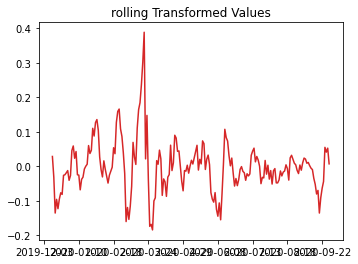

In [59]:
# Ex1_2) rolling horizon을 사용하여 deTrend 
# define a dataset with a linear trend
v1 = var.kousx
# remove rolling horizon the dataset
inverted = rolling_7(v1)

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="rolling Transformed Values", ax=ax1);

In [60]:
#결측치 확인
inverted.isnull().sum()

6

In [61]:
#결측치 제거하고 시행
sTest(inverted.dropna())

1. ADF Statistic: -5.644003
2. p-value: 0.000001
3. Num Of Lags :  8
4. Num Of Observations : 191
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Stationary



False

205


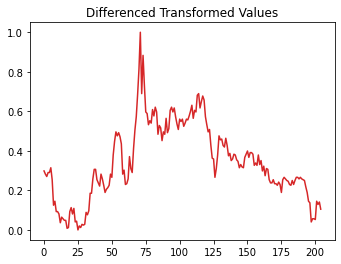

In [24]:
# Ex2) 차분을 사용하여 deTrend 

# define a dataset with a linear trend
v1 = var.kousx

# difference the dataset
diff = difference(v1)
# invert the difference
inverted = pd.Series([inverse_difference(v1[i], diff[i]) for i in range(len(diff))])

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="Differenced Transformed Values", ax=ax1);

In [25]:
#결측치 확인
inverted.isnull().sum()


0

In [26]:
#결측치 제거하고 시행
sTest(inverted.dropna())


1. ADF Statistic: -1.538967
2. p-value: 0.514154
3. Num Of Lags :  6
4. Num Of Observations : 198
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
nonStationary



True

206


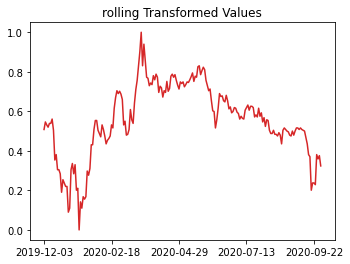

In [50]:
# define a dataset with a linear trend
v1 = var.kousx
# remove rolling horizon the dataset
inverted = powTrans(v1)

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="rolling Transformed Values", ax=ax1);

In [51]:
#결측치 확인
inverted.isnull().sum()

0

In [52]:
#sTest 시행
sTest(inverted)

1. ADF Statistic: -1.883689
2. p-value: 0.339773
3. Num Of Lags :  2
4. Num Of Observations : 203
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
nonStationary



True

206


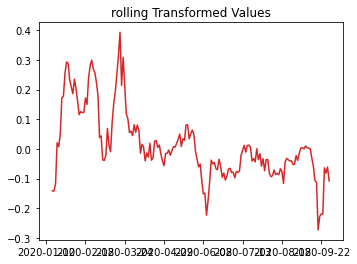

In [45]:
#power + rolling horizon
# define a dataset with a linear trend
v1 = inverted
# remove rolling horizon the dataset
inverted = rolling_30(v1)

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="rolling Transformed Values", ax=ax1);

In [48]:
inverted.max()

0.39298301043995465

In [49]:
inverted.min()

-0.27320619929583023

In [46]:
#결측치 확인
inverted.isnull().sum()

29

206


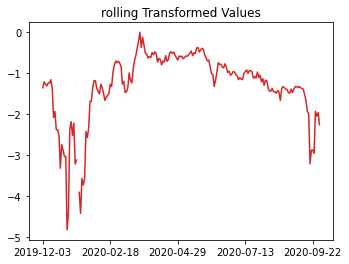

In [30]:
# Ex1) rolling horizon을 사용하여 deTrend 
# define a dataset with a linear trend
v1 = var.kousx
# remove rolling horizon the dataset
inverted = logTrans(v1)

print(len(inverted))
ax1 = plt.subplot(121)
inverted.plot(figsize=(12,4) ,color="tab:red", title="rolling Transformed Values", ax=ax1);

In [33]:
#결측치 확인
inverted.isnull().sum()

0

In [41]:
#sTest 시행
sTest(inverted)

MissingDataError: exog contains inf or nans

In [34]:
#결측치 제거하고 시행
sTest(inverted.dropna())

MissingDataError: exog contains inf or nans